### Wine Quality
April Meyer  
Course: DSC530-T301 Data Exploration and Analysis


Some research questions I want to ask from this dataset are below:
* Are there any outliers that show excellent or poor white wines? 
* Which attributes (physicochemical tests) give to higher quality?  

Below is a list of the variables with descriptions: 
* volatile acidity – amount of acetic acid in wine
* citric acid – adds 'freshness' and flavor
* residual sugar – amount of sugar remaining after fermentation
* chlorides – the amount of salt
* free sulfur dioxide –prevents microbial growth and the oxidation of wine
* total sulfur dioxide – amount of free and bound forms of S02 - an antimicrobial and antioxidant
* density – the density of wine
* pH –how acidic/basic it is. Scale is from 0 (very acidic) to 14 (very basic).
* sulphates – a wine additive
* alcohol – the percent alcohol content of the wine
* quality – output variable (based on sensory data, score between 0 and 10)

In [1]:
#importing the libraries needed
from __future__ import print_function, division
import sys
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import scatter
import statsmodels.formula.api as smf

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [2]:
# I did have some problems here. It was not separating the columns until I changed sep = ;
# white = 1, red = 2
white_wine = pd.read_csv("winequality-white.csv", sep=';'  , engine='python')
white_wine["type"] = 1
red_wine = pd.read_csv("winequality-red.csv", sep=';'  , engine='python')
red_wine["type"] = 2
all_wine=pd.concat([red_wine,white_wine],axis=0)

In [3]:
all_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [4]:
# showing the number of rows and columns
print(all_wine.info())
print(red_wine.info())
print(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null floa

In [5]:
# A minimum of 5 variables in your dataset used during your analysis
# Describe what the 5 variables mean in the dataset
# Include the other descriptive characteristics about the variables
all_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,1.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


In [6]:
# Remove spaces from column names. I was getting erros with spaces. 
all_wine.columns = [x.strip().replace(' ','_') for x in white_wine.columns]
red_wine.columns = [x.strip().replace(' ','_') for x in white_wine.columns]
white_wine.columns = [x.strip().replace(' ','_') for x in white_wine.columns]

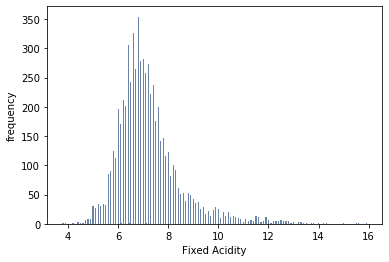

In [7]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.fixed_acidity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Fixed Acidity', ylabel='frequency')

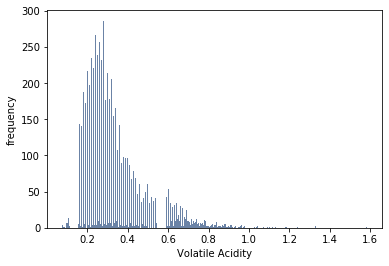

In [8]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.volatile_acidity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Volatile Acidity', ylabel='frequency')

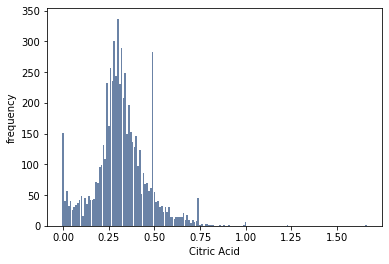

In [9]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.citric_acid)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Citric Acid', ylabel='frequency')

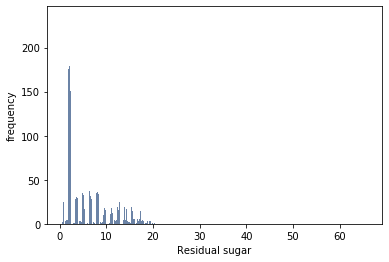

In [10]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.residual_sugar)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Residual sugar', ylabel='frequency')

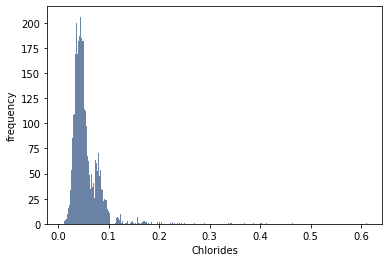

In [11]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.chlorides)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Chlorides', ylabel='frequency')

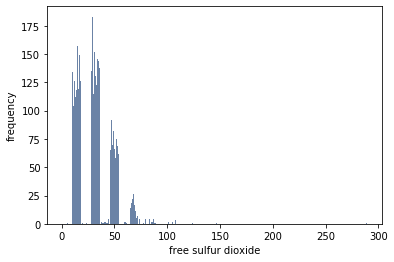

In [12]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.free_sulfur_dioxide)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='free sulfur dioxide', ylabel='frequency')

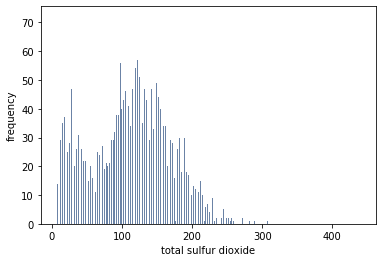

In [13]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.total_sulfur_dioxide)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='total sulfur dioxide', ylabel='frequency')

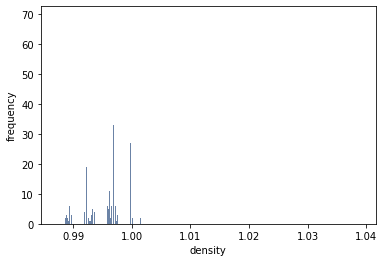

In [14]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.density)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='density', ylabel='frequency')

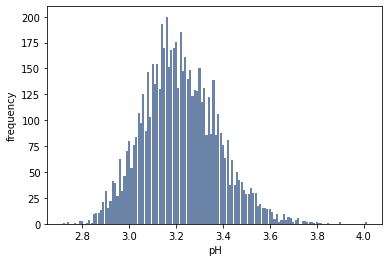

In [15]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.pH)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='pH', ylabel='frequency')

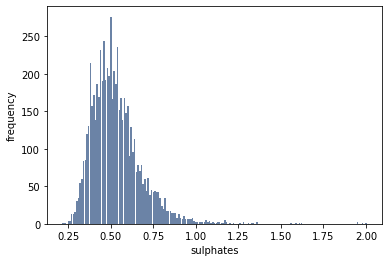

In [16]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.sulphates)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='sulphates', ylabel='frequency')

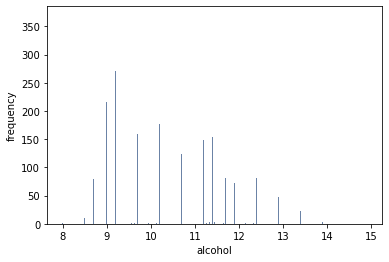

In [17]:
#histogram of the different variables 
hist = thinkstats2.Hist(all_wine.alcohol)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='alcohol', ylabel='frequency')

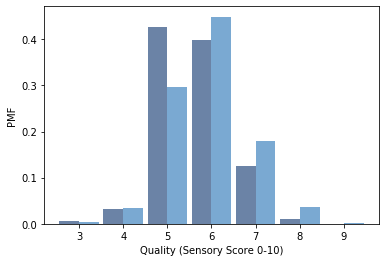

In [30]:
# compare two scenarios in your data using a PMF. this isn’t comparing two variables against each other.
# it is the same variable, but a different scenario.  Almost like a filter. 
    
red_PMF = thinkstats2.Pmf(red_wine.quality, label='Red')
white_PMF = thinkstats2.Pmf(white_wine.quality, label='White')
width=0.45
thinkplot.Hist(red_PMF, align='right', width=width)
thinkplot.Hist(white_PMF, align='left', width=width)
thinkplot.Config(xlabel='Quality (Sensory Score 0-10)', ylabel='PMF')

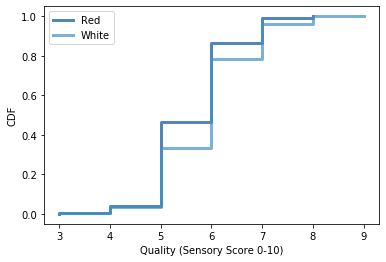

In [19]:
# Create 1 CDF with one of your variable
red_CDF = thinkstats2.Cdf(red_wine.quality, label='Red')
white_CDF = thinkstats2.Cdf(white_wine.quality, label='White')

thinkplot.PrePlot(2)
thinkplot.Cdfs([red_CDF, white_CDF])
thinkplot.Config(xlabel='Quality (Sensory Score 0-10)', ylabel='CDF')

Mean, Var 5.818652849740933 0.6706773498902144
Sigma 0.8189489299646312


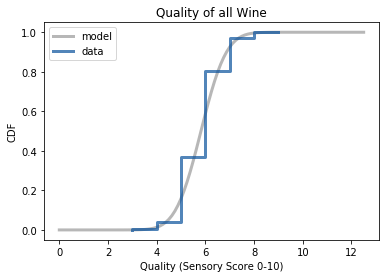

In [20]:
# Plot 1 analytical distribution ch5 - normal model to fit the distribution
'''empirical: based on, concerned with, or verified by observation or experience.
analytical: based on analysis or logic. analytical expression is a formula'''


# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(all_wine.quality, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(all_wine.quality, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Quality of all Wine',
                 xlabel='Quality (Sensory Score 0-10)',
                 ylabel='CDF')

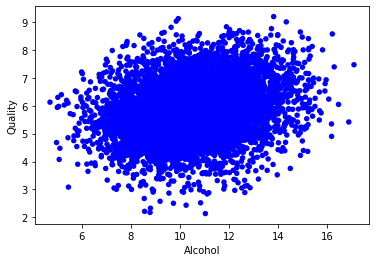

In [21]:
# two scatter plots comparing two variables 
alcohol = Jitter(all_wine.alcohol, 1.4)
quality = Jitter(all_wine.quality, 0.5)
thinkplot.Scatter(alcohol, quality, alpha=1)
thinkplot.Config(xlabel='Alcohol',
                 ylabel='Quality',
                 legend=False)

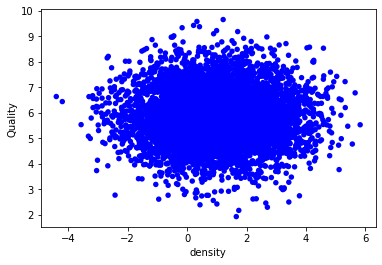

In [22]:
# two scatter plots comparing two variables 
density = Jitter(all_wine.density, 1.4)
quality = Jitter(all_wine.quality, 0.5)
thinkplot.Scatter(density, quality, alpha=1)
thinkplot.Config(xlabel='density',
                 ylabel='Quality',
                 legend=False)

In [23]:
# Conduct a test on your hypothesis ch9
#correlation matrix to see what variables correlate the most
#A correlation matrix is a table showing correlation coefficients between variables
all_wine.corr(method='spearman')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
fixed_acidity,1.000000,0.200272,0.270568,-0.032254,0.355964,-0.259914,-0.233259,0.434056,-0.250044,0.220145,-0.110650,-0.098154,0.423682
volatile_acidity,0.200272,1.000000,-0.295129,-0.064384,0.415896,-0.365673,-0.343534,0.261437,0.194876,0.255042,-0.023924,-0.257806,0.599149
citric_acid,0.270568,-0.295129,1.000000,0.074920,-0.074084,0.122058,0.159355,0.065690,-0.285905,0.036898,0.019653,0.105711,-0.161228
residual_sugar,-0.032254,-0.064384,0.074920,1.000000,-0.035800,0.387750,0.454886,0.526664,-0.229344,-0.138157,-0.329218,-0.016891,-0.256540
chlorides,0.355964,0.415896,-0.074084,-0.035800,1.000000,-0.260421,-0.268434,0.590729,0.163528,0.370450,-0.401270,-0.295054,0.665253
free_sulfur_dioxide,-0.259914,-0.365673,0.122058,0.387750,-0.260421,1.000000,0.741438,0.005841,-0.164699,-0.221062,-0.186046,0.086865,-0.520127
total_sulfur_dioxide,-0.233259,-0.343534,0.159355,0.454886,-0.268434,0.741438,1.000000,0.061540,-0.242719,-0.256745,-0.308982,-0.054777,-0.676231
density,0.434056,0.261437,0.065690,0.526664,0.590729,0.005841,0.061540,1.000000,0.011777,0.274792,-0.699442,-0.322806,0.408356
pH,-0.250044,0.194876,-0.285905,-0.229344,0.163528,-0.164699,-0.242719,0.011777,1.000000,0.254263,0.140225,0.032538,0.336506
sulphates,0.220145,0.255042,0.036898,-0.138157,0.370450,-0.221062,-0.256745,0.274792,0.254263,1.000000,0.004583,0.029831,0.494377


In [24]:
all_wine.corr(method='spearman')['quality']

fixed_acidity          -0.098154
volatile_acidity       -0.257806
citric_acid             0.105711
residual_sugar         -0.016891
chlorides              -0.295054
free_sulfur_dioxide     0.086865
total_sulfur_dioxide   -0.054777
density                -0.322806
pH                      0.032538
sulphates               0.029831
alcohol                 0.446925
quality                 1.000000
type                   -0.123001
Name: quality, dtype: float64

In [25]:
#A correlation matrix is a table showing correlation coefficients between variables
red_wine.corr(method='spearman')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
fixed_acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084,NaN
volatile_acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647,NaN
citric_acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481,NaN
residual_sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048,NaN
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922,NaN
free_sulfur_dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901,NaN
total_sulfur_dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735,NaN
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074,NaN
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672,NaN
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060,NaN


In [26]:
#A correlation matrix is a table showing correlation coefficients between variables
white_wine.corr(method='spearman')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
fixed_acidity,1.000000,-0.042865,0.297878,0.106725,0.094691,-0.024542,0.112649,0.270031,-0.418341,-0.013238,-0.106827,-0.084485,NaN
volatile_acidity,-0.042865,1.000000,-0.150410,0.108627,-0.004934,-0.081213,0.117614,0.010124,-0.045204,-0.016902,0.033967,-0.196562,NaN
citric_acid,0.297878,-0.150410,1.000000,0.024621,0.032659,0.088314,0.093219,0.091425,-0.146193,0.079766,-0.029170,0.018333,NaN
residual_sugar,0.106725,0.108627,0.024621,1.000000,0.227844,0.346107,0.431252,0.780365,-0.180028,-0.003844,-0.445257,-0.082070,NaN
chlorides,0.094691,-0.004934,0.032659,0.227844,1.000000,0.167046,0.375244,0.508302,-0.054006,0.093931,-0.570806,-0.314488,NaN
free_sulfur_dioxide,-0.024542,-0.081213,0.088314,0.346107,0.167046,1.000000,0.618616,0.327822,-0.006274,0.052252,-0.272569,0.023713,NaN
total_sulfur_dioxide,0.112649,0.117614,0.093219,0.431252,0.375244,0.618616,1.000000,0.563824,-0.011829,0.157825,-0.476619,-0.196680,NaN
density,0.270031,0.010124,0.091425,0.780365,0.508302,0.327822,0.563824,1.000000,-0.110061,0.095079,-0.821855,-0.348351,NaN
pH,-0.418341,-0.045204,-0.146193,-0.180028,-0.054006,-0.006274,-0.011829,-0.110061,1.000000,0.140243,0.148857,0.109362,NaN
sulphates,-0.013238,-0.016902,0.079766,-0.003844,0.093931,0.052252,0.157825,0.095079,0.140243,1.000000,-0.044868,0.033319,NaN


In [27]:
# conduct a regression analysis
# multiple regression with all fields
all_variables = smf.ols('quality ~ total_sulfur_dioxide + free_sulfur_dioxide + chlorides + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density + type', data=all_wine).fit()
print(all_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        14:51:14   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              104.6824 

In [28]:
# multiple regression using only 
less_variables = smf.ols('quality ~ volatile_acidity + chlorides + alcohol + density + type', data=all_wine).fit()
print(less_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     480.1
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        14:51:16   Log-Likelihood:                -7315.5
No. Observations:                6497   AIC:                         1.464e+04
Df Residuals:                    6491   BIC:                         1.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -26.7271      4.974  

#### Reference
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
